# Get scores for diff seqs from hg38

In [2]:
import pandas as pd
import numpy as np
import os
import gc

import seaborn as sns
import matplotlib.pyplot as plt

import random

os.chdir("/home/elise/projects/whole-genome-tiling-predictions/")

In [3]:

print("reading files...")

N2a_human = pd.read_csv("scores/PB-PY-0011.hg38.scores.txt",
                       sep='\t').filter(['sequence','prediction','region'])
N2a_human['prediction'] = pd.to_numeric(N2a_human['prediction'])
print(N2a_human.head)


HepG2_human = pd.read_csv("scores/PB-PY-0012.hg38.scores.txt",
                       sep='\t').filter(['sequence','prediction','region'])
HepG2_human['prediction'] = pd.to_numeric(HepG2_human['prediction'])
print(HepG2_human.head)



reading files...
<bound method NDFrame.head of                                                    sequence  prediction  \
0         TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC...   -0.007660   
1         ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...    0.066999   
2         CCTAACCCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA...   -0.068959   
3         TAACCCTAACCCTAACCCTAACCCTAACCTAACCCTAACCCTAACC...   -0.173480   
4         CCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCC...   -0.020042   
...                                                     ...         ...   
64334862  TTTAGACCTTTAAGGTGAGTGTTACAGCACTGAAAGATGTTATGTC...   -0.827126   
64334863  GTTTTTTCCTTCAGATATTTCCAGAGTTTCTTCCATCTCGCAGGTT...   -0.996833   
64334864  GTCTTGGTCACTTCAAGAATGAAGCTGCAGACCTTAGTGGTGAGGG...   -0.980638   
64334865  AGCACTTAAAGGTGTTATGTCCAGAGTTTTTTCCTACAGATGTGTC...   -0.664841   
64334866  GTTTCTTCCTTCTGGCGGGTTCATGGTCTTGCTCACTTCAAGAATG...   -0.074509   

                                      region  
0    

In [4]:

both_human = (N2a_human
                  .rename(columns={'prediction':'N2a'})
                  .filter(['region','sequence','N2a'])
                  .merge(HepG2_human
                         .rename(columns={'prediction':'HepG2'})
                         .filter(['region','sequence','HepG2']),
                                  on=('region','sequence'))
                  .drop_duplicates() )
#              .assign(diff=lambda x: x['HepG2']-x['N2a']) )


In [5]:
print(N2a_human.shape)
print(HepG2_human.shape)
print(both_human.shape)
#print(both_human.drop_duplicates().shape)

(64334867, 3)
(64334867, 3)
(60981881, 4)


KeyboardInterrupt: 

In [6]:
del N2a_human
del HepG2_human
gc.collect()

8

In [7]:
print(both_human.shape)
print(both_human.head)

#both_human['N2a'] = pd.to_numeric(both_human['N2a'])
#both_human['HepG2'] = pd.to_numeric(both_human['HepG2'])
both_human['diff'] = both_human['HepG2'] - both_human['N2a']

both_human.to_csv("scores/both.hg38.scores.txt",
                                          sep='\t',
                                         index=False)



(60981881, 4)
<bound method NDFrame.head of                                        region  \
0                            chr1:10000-10170   
1                            chr1:10050-10220   
2                            chr1:10100-10270   
3                            chr1:10150-10320   
4                            chr1:10200-10370   
...                                       ...   
114848658  chrY_KI270740v1_random:36850-37020   
114848659  chrY_KI270740v1_random:36900-37070   
114848660  chrY_KI270740v1_random:36950-37120   
114848661  chrY_KI270740v1_random:37000-37170   
114848662  chrY_KI270740v1_random:37050-37220   

                                                    sequence       N2a  \
0          TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAC... -0.007660   
1          ACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCC...  0.066999   
2          CCTAACCCAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA... -0.068959   
3          TAACCCTAACCCTAACCCTAACCCTAACCTAACCCTAACCCTAACC... -0.173480 

In [10]:
diff_file = open("scores/results2both.4_rep_seq_human.list",'r')
diff_seqs = [x.strip() for x in diff_file.read().splitlines()]

print(diff_seqs[1:4])

['chr10:86804650-86804820', 'chr10:86838700-86838870', 'chr10:86866250-86866420']


In [11]:
both_human_diff = (both_human
                   .query("region in @diff_seqs"))
print(both_human_diff.shape)

(63965, 5)


In [12]:
del both_human
gc.collect()

24

In [38]:
both_human_keep = pd.DataFrame(columns=both_human_diff.columns)

for i in range(-10,0):
    #print(i)
    for j in range(-10,0):
        keep_rows = ( both_human_diff
                                  .query("@i < N2a <= @i+1")
                                  .query("@j < HepG2 <= @j+1") )
        if len(keep_rows) > 0:
            #print(j)
            #print(keep_rows.head)
            both_human_keep = both_human_keep.append( keep_rows
                                   .sample(min(200,len(keep_rows)), 
                                               replace=False) )
    for j in range(0,11):
        keep_rows = ( both_human_diff
                                  .query("@i < N2a <= @i+1")
                                  .query("@j < HepG2 <= @j+1") )
        if len(keep_rows) > 0:
            #print(j)
            #print(keep_rows.head)
            both_human_keep = both_human_keep.append( keep_rows
                                   .sample(min(1000,len(keep_rows)), 
                                               replace=False) )

for i in range(0,11):
    #print(i)
    for j in range(-10,0):
        keep_rows = ( both_human_diff
                                  .query("@i < N2a <= @i+1")
                                  .query("@j < HepG2 <= @j+1") )
        if len(keep_rows) > 0:
            #print(j)
            #print(keep_rows.head)
            both_human_keep = both_human_keep.append( keep_rows
                                   .sample(min(1000,len(keep_rows)), 
                                               replace=False) )
    for j in range(0,11):
        keep_rows = ( both_human_diff
                                  .query("@i < N2a <= @i+1")
                                  .query("@j < HepG2 <= @j+1") )
        if len(keep_rows) > 0:
            #print(j)
            #print(keep_rows.head)
            both_human_keep = both_human_keep.append( keep_rows
                                   .sample(min(1000,len(keep_rows)), 
                                               replace=False) )
print(both_human_keep.shape)
both_human_keep.to_csv("scores/both.hg38.scores.diff_filt.txt",
                                          sep='\t',
                                         index=False)
            

(6441, 5)


In [35]:
both_human_keep['seq24'] = both_human_keep['sequence'].str[:24]
print(both_human_keep['seq24'].value_counts())

#print(both_human_keep[both_human_keep["sequence"].str.contains("N")].head)
print(both_human_keep.shape)
print(both_human_keep[~both_human_keep["sequence"].str.contains("N")].shape)
both_human_keep = both_human_keep[~both_human_keep["sequence"].str.contains("N")]
both_human_keep_filt = (both_human_keep_filt
                       .sort_values('diff',ascending=True)
                       .drop_duplicates('seq24'))
print(both_human_keep['seq24'].value_counts())

print(both_human_keep.shape)
print(both_human_keep_filt.shape)

TTTTTTTTTTTTTTTTTTTTTTTT    5
NNNNNNNNNNNNNNNNNNNNNNNN    5
GCACTGGGAAATGGTGAAGGGCAC    4
GCACTGGGGAATGGTGAGGAGCAC    4
ATGGTGAAGGGCACTGGGGAATGG    3
                           ..
GCTTGAGGCCAGGATGTCGAGACC    1
GCCATTATTCAGTTCTCATCTTTC    1
CCCAGCACTTTGGGAGACCAAGGC    1
CTTCCCTTGTTCAAATCCCCAGAT    1
GTGGGTGGTACTGGCTTCTTGCTG    1
Name: seq24, Length: 4352, dtype: int64
(4381, 6)
(4371, 6)
TTTTTTTTTTTTTTTTTTTTTTTT    5
GCACTGGGGAATGGTGAGGAGCAC    4
GCACTGGGAAATGGTGAAGGGCAC    4
ATGGTGAGGAGCACTGGGAAATGG    3
GCACTGGGGAATGGTGAGAGGCAC    3
                           ..
CAGCAGCACTAATGGAGGGTCAGA    1
GCTTGAGGCCAGGATGTCGAGACC    1
GCCATTATTCAGTTCTCATCTTTC    1
CCCAGCACTTTGGGAGACCAAGGC    1
GTGGGTGGTACTGGCTTCTTGCTG    1
Name: seq24, Length: 4346, dtype: int64
(4371, 6)
(10291, 6)


(4371, 6)


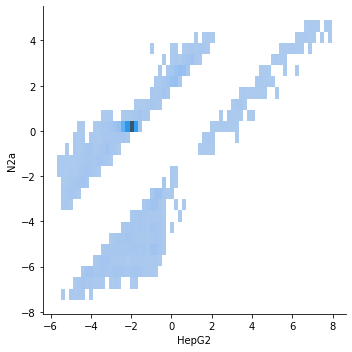

In [36]:
print(both_human_keep.shape)

sns.displot(data=both_human_keep,
           x='HepG2', y='N2a')

In [8]:
print(dir())
gc.collect()

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_ih', '_ii', '_iii', '_oh', 'exit', 'gc', 'get_ipython', 'np', 'os', 'pd', 'plt', 'quit', 'sns']


195